# ***California House Price Prediction Analysis***

based on the data from the provided link, this task tended to be an experiment of regression by using five models that are: 

1. **KNearest Neighbor**:
   - Consider ourselves attempting to estimate someone's age at a party. KNN is similar to asking our K neighbours, who are the individuals closest to them, how old they believe that person to be. We then calculate our final forecast by averaging those estimations.

2. **Support Vector Regressor (SVR)**:
   - This one is a little more difficult, but let's say that we are attempting to sketch a line that best divides several coloured dots on a graph. Finding that line is similar to SVR in that each new point that is near it receives a prediction value that is comparable to it.

3. **Decision Tree**:
   - This is basically a choose-our-own-adventure story about prediction! We answer a series of questions concerning the data, such as "Is the house size large?" Depending on our responses, we'll arrive at a final price forecast.

4. **Random Forest**:
   - Consider having a forest of decision trees (many!), each making its own forecast. Random Forest is analogous to taking an average of all the forecasts from the many trees to obtain a final, more precise estimate.

5. **Boosting (GradientBoost)**:
   - This one is more complex, but think of it as instructing a group of pupils. Each learner improves by learning from the errors of those who came before them. Boosting develops models consecutively, with each new model attempting to fix the mistakes of the prior one.

***Objective***: 

The dataset seems decent to use a model of regression, Therefore, this task tended to predict the price of a desire house to a client with various additional facility such as area (square feet), bedrooms, bathrooms, guest room, stories, parking, water heater, air conditioning, furnishing status, and location such as main road connection, and preferred area that matched with the client's budget.


> **Legends**:  
*IMV*   : Identified Missing Values  
*IQR*   : Interquartile Range  
*MAE*   : Mean Absolute Error  
*RF*    : Random Forest

### ***2. Libraries Import***

this markdown indicates that the libraries will be used in this task are: 

- `Pandas`  
- `Numpy`  
- `Matplotlib`  
- `Seaborn`  
- `Sci-kit Learn`  

there are some additional tools for this task:

- `pickle`  
- `json`  
- `warnings`  
- `phik`

In [1]:
# Import the libraries that will be used in this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json 
import warnings
import phik


# Sci-kit methods that will be used in this task
from scipy.stats import skew, zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, make_scorer

# Modelling tools
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





### ***3. Data Loading***

this markdown is the preliminary data exploration before further research conducted. the dataset that will be used is [House in California](Housing.csv)

In [2]:
# Write your code here

# Conducting Investigation of the dataset
df = pd.read_csv('Housing.csv')

# Generate the dataset into a table
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Generate the info details from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Observe the duplicated rows in the data
df.duplicated().sum()

0

In [5]:
# Observe the IMV
missingValues = df.isnull().sum()
print("Total of IMV for each columns:")
print(missingValues)

Total of IMV for each columns:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


there are no IMV so we can proceed the preliminary exploration

In [6]:
# Observe the Uniques Numbers in the dataset
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [7]:
# Observe the dataset's statistical
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### ***4. Exploratory Data Analysis (EDA)***

This is for the deeper research to get to know the data-- what kind of data we handle before we doing further process based on the task requirement. In this case, we would like to do modelling through regression. 

In [8]:
# Write your code here

# Observe the statistics of price
df.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

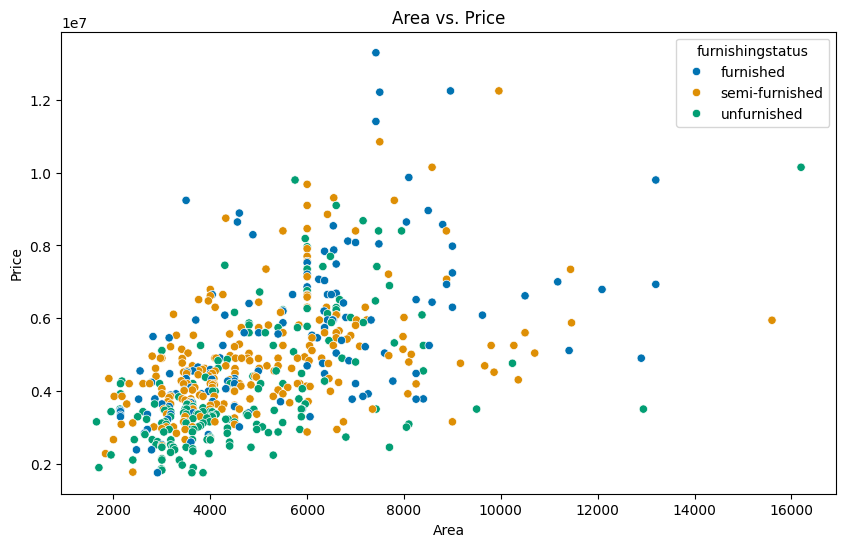

In [9]:
# Visualise the price based on the area in square-feet including the furnishing status
plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", hue='furnishingstatus', data=df, palette='colorblind')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.show()

based on the scatter plot above, it indicates that, the more expensive price is, not necessarily wider for the area, it depends on the interior design, designer, and the furniture (if it's included). On the other hand, it classified into three groups, there are unfurnished house, semi-furnished house, and furnished house (fully furnished). The priciest house is a fully furnished house at 13 million dollars with 7420 square feet, second priciest house is a semi-furnished house at 12 million ish dollars with 10000 square feet, then the third priciest unfurnished house is at 11 million dollars but has the biggest areas which is almost 17000 square feet.   

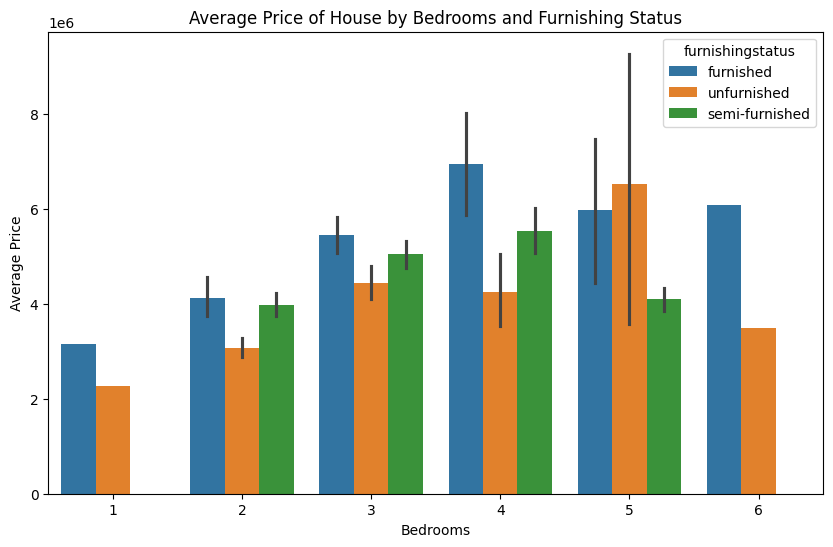

In [10]:
# Visualise the average price based on bedrooms and furnishing

plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price of House by Bedrooms and Furnishing Status")
plt.show()

the graph shows that the data provide all prices with the average based on the status of furnishing in a house, starting from unfurnished, semi-furnished, and fully furnished (in this graph furnished considered as fully furnished). the black line indicates the average price that actually quite popular for people to look. 

the countermeasure based on bedrooms, it is one of the most important for people to buy a house because the very first thing that people look at, is the number of bedrooms. 

it seems that the cheapest price for a house is for one bedroom only categorised for furnised and semi-furnished only. then the most expensive price is at the house with four bedrooms furnished, then five bedrooms semi-furnished, last is the unfurnished house with four bedrooms. 

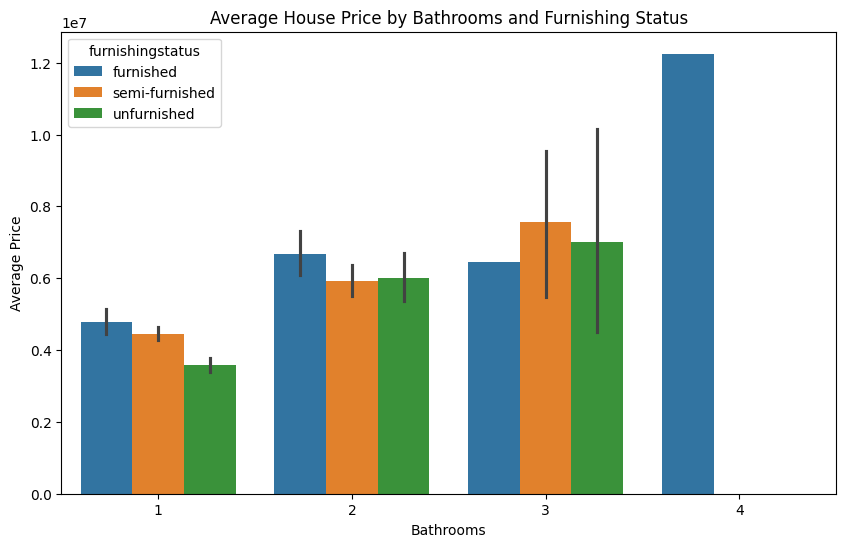

In [11]:
# Visualise the average price based on bathrooms and furnishing

plt.figure(figsize=(10, 6))
sns.barplot(x="bathrooms", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Bathrooms")
plt.ylabel("Average Price")
plt.title("Average House Price by Bathrooms and Furnishing Status")
plt.show()

The graph shows average house prices based on how furnished they are (unfurnished, semi-furnished, and furnished) - the black line shows the most popular option (likely the average price). The number of bathrooms is also important after bedrooms, as it's one of the first things people consider when buying a house.

now if we rank from the most expensive, it is obvious that the house which has the most bathrooms is the most expensive as the dataset didn't provide the four bathrooms for semi-furnished and unfurnished house. On the other hand, the second most expensive house is on the three bathrooms with the semi-furnished status, following by the third most expensive is unfurnished house with the three bathrooms. 

Moreover, when we rank the cheapest price of a house, it seems that the unfurnished with one bathrooms is the cheapest, then following by the semi-furnished one, then the last cheapest is the furnished house with one bathroom. 

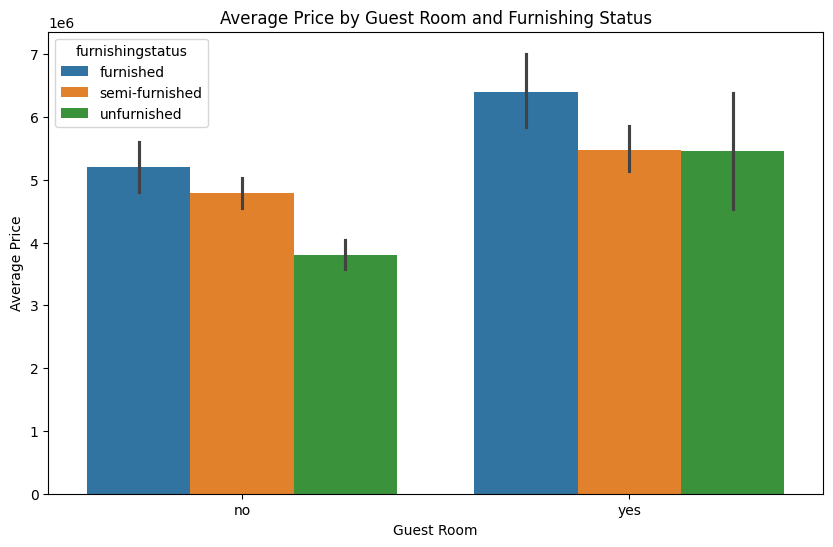

In [12]:
# Visualisation of Average price based on the guest room grouped by furnishing status
plt.figure(figsize=(10, 6))
sns.barplot(x="guestroom", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Guest Room")
plt.ylabel("Average Price")
plt.title("Average Price by Guest Room and Furnishing Status")
plt.show()

The graph shows that the data provide all prices with the average based on the status of furnishing in a house, starting from unfurnished, semi-furnished, and fully furnished (in this graph furnished considered as fully furnished). the black line indicates the average price that actually quite popular for people to look.

The countermeasure based on guest room, it is one of the most important after bedroom and bathroom for people to buy a house because the very first thing that people look at, is the number of bedrooms, then following by the guest room for additional room if they have a guest that wants to live overnight or so on.  

Since the guestroom is kinda mid for the consideration of buying a house, some people might assume that more bedroom are more acceptable as a guestroom-- based on the dataset, guest room is not as much as bedrooms and bathrooms. Since the options are only two from the dataset, a house with a guest room and a house without it, we can rank it below. 

The most expensive is on the house furnished, with a guest room, following by semi-furnished one, then the unfurnished one. 

seems that the house without guest room looks sequentially variative, starting from the furnished house is the most expensive, then down to the semi-furnished house, following by the unfurnished house. 

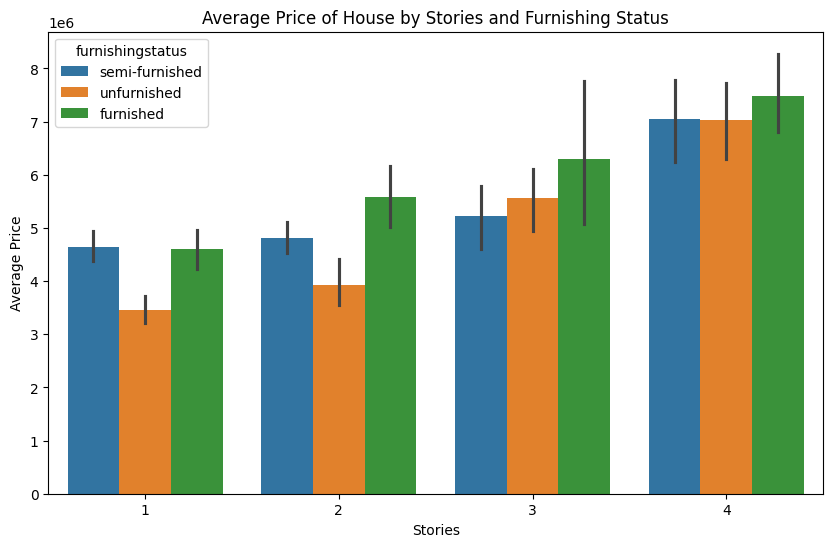

In [13]:
# Visualisation of Average price based on the guest room grouped by furnishing status
plt.figure(figsize=(10, 6))
sns.barplot(x="stories", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Stories")
plt.ylabel("Average Price")
plt.title("Average Price of House by Stories and Furnishing Status")
plt.show()

now we believe there are some people wanted to have a house with counts of stories. what does stories means in housing aspect is how many level a house has. for example, if we see a big house we thinking that the house has two level. the two level as we called it *stories*. 

the graphs shows that in the housing market, price goes up with both the number of stories and if the house comes furnished, although the furniture price increase seems consistent regardless of story count.

there might be some variative counts, it could be the layout, the design (for the furnished and semi-furnished-- for the unfurnished one could be the house's quality from a good property developer) of the stories what makes the price could become expensive at some stories' availability. 

to sum it up, it is obvious that the more stories is, the more expensive the price is. 

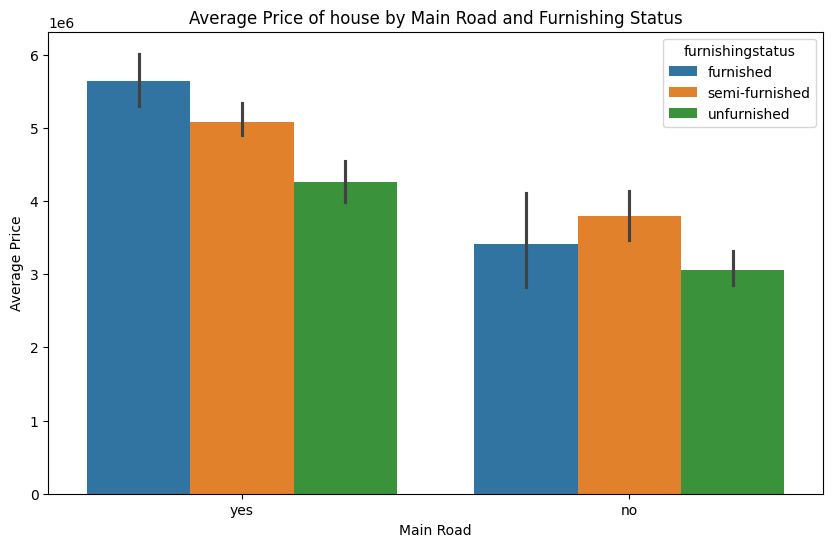

In [14]:
# Visualise the houses that connected to the main road
plt.figure(figsize=(10, 6))
sns.barplot(x="mainroad", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Main Road")
plt.ylabel("Average Price")
plt.title("Average Price of house by Main Road and Furnishing Status")
plt.show()

what does main road here means that the house are connected to the main road directly or not. it is common approach for property developer to reach their sale target which means that a house that connected to a main road is one of the strongest measure for pique their customer's interest. 

The graph shows the average price of a house by main road and finishing status.

The average price of a house on a main road is more expensive than one that is not on a main road, regardless of furnishing status.  

Furnished houses are generally more expensive than unfurnished houses on both main roads and non-main roads.

to put it simply if we talk about the main road as the effective measurement for a house, houses on main roads are pricier overall, regardless of whether they're furnished or not.

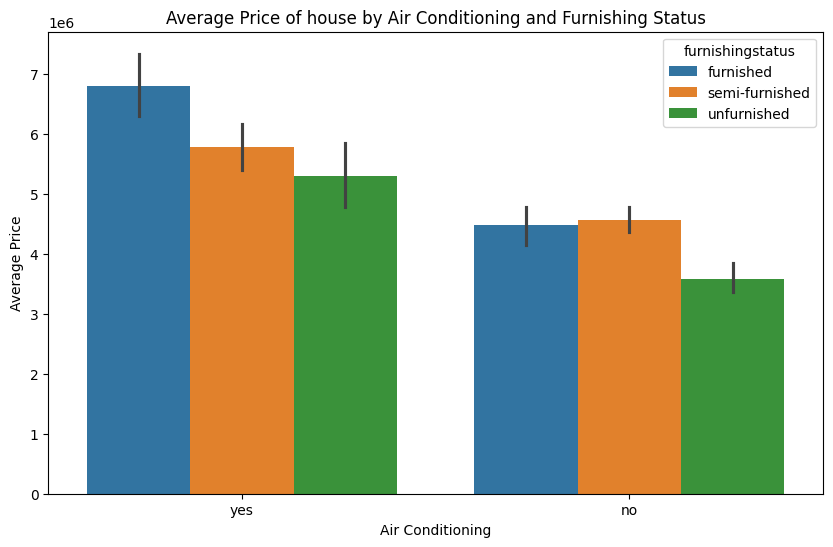

In [15]:
# Visualise the houses that has air conditioning
plt.figure(figsize=(10, 6))
sns.barplot(x="airconditioning", y="price", hue="furnishingstatus", data=df)
plt.xlabel("Air Conditioning")
plt.ylabel("Average Price")
plt.title("Average Price of house by Air Conditioning and Furnishing Status")
plt.show()

Air Conditioning is one of the necessary home appliance because this electronic device's function is to make a room feel cooler. For instance, when the summer comes, people felt hot then they want to cool their bodies. Therefore the graph above is the visualisation of air conditioning availability to each houses based on furnishing status. 

we can depict that most houses with air conditioning is for the furnished one with the most expensive price, following by the semi-furnished house, then lastly unfurnished one. 

Moreover, a house without air conditioning is also quite popular for the client's demand, starting from the most houses available-- which is semi-furnished houses without air conditioning reaching to the top, next is the furnished houses, then again lastly the houses unfurnished. 

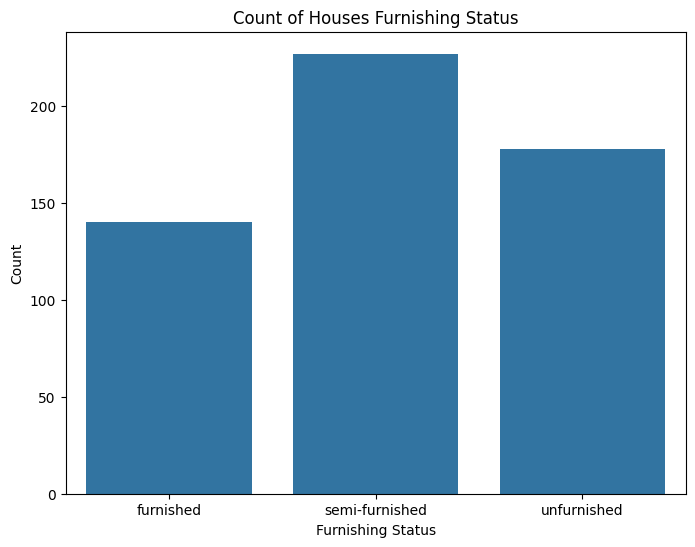

In [16]:
# Visualisation of the total furnished status
plt.figure(figsize=(8, 6))
sns.countplot(x="furnishingstatus", data=df)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Houses Furnishing Status")
plt.show()

the graph above represents the counts of the houses from the dataset. based on the dataset provided, the most number of houses are the semi-furnished house with 250 houses following by 180 houses unfurnished, then 140 houses of fully furnished. 

this could be a rough analysis that most people tended to pick a house with semi-furnished due to their own desire to fill their house when they have it, then the time they have a house, they could be creative to fill their own interior design how they want. 

now the EDA finished here, we can proceed to the next step which is Feature Engineering. 

### ***5. Feature Engineering***

The act of choosing, modifying, and converting unprocessed data into features that may be applied to supervised learning is known as ***feature engineering***. in this case, what we want to do is we want to pick, customise, and transform the dataset to predict the price of house by using the model given in the task. 


In [17]:
# Split the feature matrix and the target array within the data
X = df.drop(['price'], axis=1)
y = df.price

# Display the first five observation
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
# Divide the train-set & the test-set by using `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(f'Train Size : {X_train.shape}')
print(f'test Size : {X_test.shape}')
print(f'Train Size: {y_train.shape}')
print(f'Test size: {y_test.shape}')

# show the first 5 feature matrix of Train
X_train.head()

Train Size : (436, 12)
test Size : (109, 12)
Train Size: (436,)
Test size: (109,)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
425,3185,2,1,1,yes,no,yes,no,no,2,no,furnished
243,2550,3,1,2,yes,no,yes,no,no,0,no,furnished
440,3640,4,1,2,yes,no,yes,no,no,0,no,unfurnished
279,6360,2,1,1,yes,no,no,no,no,0,no,furnished
395,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished


This is the first step of doing feature engineering. we are going to do the regression models based on the task's requirement and the dataset's type. by splitting the train-test set, drop one column for the suitable prediction, then we can carry on to the next step

##### ***Outliers Handling***

we may occasionally come across extremely cheap apartments or extremely expensive properties in our data. We refer to these as outliers. In feature engineering, treating outliers is similar to organising our data: we choose whether to preserve those odd points or smooth them out a little to make them easier to interpret for our machine learning model.


In [19]:
# Outlier handling

# variable container for looping
normal = []
skew = []
extremeSkew = []

column = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# create a condition for the whole columns after being filtered
for i in column: 
    skewness = df[i].skew()
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <= 1:
        skew.append(i)
    elif skewness < -1 or skewness > 1: 
        extremeSkew.append(i)

print(f'the normal result is: {normal}')
print(f'the skew result is: {skew}')
print(f'the extreme skew is: {extremeSkew}')  

the normal result is: ['bedrooms']
the skew result is: ['parking']
the extreme skew is: ['area', 'bathrooms', 'stories']


to observe the outliers' dataset, this is how we conduct the outliers handling by checking which features normally distributed, skew, and skewed extremely. Based on the output above, it seems that the data have a mix of feature distributions. 'Bedrooms' appear normally distributed, while 'parking' has a skew. 'Area', 'bathrooms', and 'stories' show extreme skews, suggesting most values are concentrated on one side. 

now we would like to check the measurements of these outliers by going through the code below. 

In [20]:
# Check the percentage of outliers from above

# Function to calculate percentage of outliers
def percentage_outliers(data, lower_bound, upper_bound):
    total_points = len(data)
    outliers = np.sum((data < lower_bound) | (data > upper_bound))
    return (outliers / total_points) * 100

# Define the range for outliers (e.g., using IQR)
def calculate_bounds(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Dictionary to hold outliers percentage for each variable
outliers_percentage = {}

# Calculate and print the percentage of outliers for each variable
for i in column:
    lower_bound, upper_bound = calculate_bounds(df[i])
    outliers_percentage[i] = percentage_outliers(df[i], lower_bound, upper_bound)
    print(f'Percentage of outliers in {i}: {outliers_percentage[i]:.2f}%')


Percentage of outliers in area: 2.20%
Percentage of outliers in bedrooms: 2.20%
Percentage of outliers in bathrooms: 0.18%
Percentage of outliers in stories: 7.52%
Percentage of outliers in parking: 2.20%


Now that the detected outliers as we conducted the preliminary outliers checking, it seems that the whole percentage outliers are below 5% averagely even though the outliers of stories has 7.52%, to make it easier to go through, we just put the stories as the other features as well so we decided to drop the outliers since the threshold is below at 5%.

- ***outliers removal for normal distributed***

In [21]:
# Remove the outliers for normal column
def remove_outliers_with_zscore(df, column):
    # Calculate z-scores for the column
    z_scores = zscore(df[column])
    # Define threshold for outlier detection (e.g., z-score > 3 or < -3)
    threshold = 3
    # Identify outliers based on z-scores
    outliers = (np.abs(z_scores) > threshold)
    # Count outliers before removal
    prev_outliers = np.sum(outliers)
    # Remove outliers
    df = df[~outliers]
    # Count outliers after removal
    current_outliers = np.sum(np.abs(zscore(df[column])) > threshold)
    return df, prev_outliers, current_outliers

# Example usage:
column = 'bedrooms'  # Specify the column name for which you want to handle outliers
X_train, prev_outliers_bedrooms, current_outliers_bedrooms = remove_outliers_with_zscore(X_train, column)

# Print the results
print("Bedrooms Outliers:")
print(f"Previous outliers: {prev_outliers_bedrooms}")
print(f"Current outliers: {current_outliers_bedrooms}")


Bedrooms Outliers:
Previous outliers: 1
Current outliers: 0


- ***outliers removal for skewed distribution***

In [22]:
# this cell code is for handle the outliers for skew columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    high_limit = Q3 + 1.5 * IQR
    prev_outliers = len(df[(df[column] < low_limit) | (df[column] > high_limit)])
    df = df[(df[column] >= low_limit) & (df[column] <= high_limit)]
    current_outliers = len(df[(df[column] < low_limit) | (df[column] > high_limit)])
    return df, prev_outliers, current_outliers

# Remove outliers for 'parking'
X_train, prev_outliers_parking, current_outliers_parking = remove_outliers(X_train, 'parking')

# Print the results
print("Parking Outliers:")
print(f"Previous outliers: {prev_outliers_parking}")
print(f"Current outliers: {current_outliers_parking}")


Parking Outliers:
Previous outliers: 11
Current outliers: 0


- ***outliers removal for extreme skewed distribution***

In [23]:
# this cell code is for handle the outliers for skew columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 3 * IQR
    high_limit = Q3 + 3 * IQR
    prev_outliers = len(df[(df[column] < low_limit) | (df[column] > high_limit)])
    df = df[(df[column] >= low_limit) & (df[column] <= high_limit)]
    current_outliers = len(df[(df[column] < low_limit) | (df[column] > high_limit)])
    return df, prev_outliers, current_outliers

# Remove outliers for 'area'
X_train, prev_outliers_area, current_outliers_area = remove_outliers(X_train, 'area')

# Print the results of 'area'
print("Area Outliers:")
print(f"Previous outliers: {prev_outliers_area}")
print(f"Current outliers: {current_outliers_area}")

Area Outliers:
Previous outliers: 2
Current outliers: 0


In [24]:
# Remove outliers for 'bathrooms'
X_train, prev_outliers_bathrooms, current_outliers_bathrooms = remove_outliers(X_train, 'bathrooms')

# Remove outliers for 'stories'
X_train, prev_outliers_stories, current_outliers_stories = remove_outliers(X_train, 'stories')


# Print the results of 'bathrooms'
print("\nBathrooms Outliers:")
print(f"Previous outliers: {prev_outliers_bathrooms}")
print(f"Current outliers: {current_outliers_bathrooms}")

# Print the results 'stories'
print("\nstories Outliers:")
print(f"Previous outliers: {prev_outliers_stories}")
print(f"Current outliers: {current_outliers_stories}")


Bathrooms Outliers:
Previous outliers: 0
Current outliers: 0

stories Outliers:
Previous outliers: 0
Current outliers: 0


In [25]:
print(f'Train Size : {X_train.shape}')
print(f'test Size : {X_test.shape}')
print(f'train size: {y_train.shape}')
print(f'test size: {y_test.shape}')

Train Size : (422, 12)
test Size : (109, 12)
train size: (436,)
test size: (109,)


In [26]:
y_train = y_train.loc[X_train.index]

print(X_train.shape)
print(y_train.shape)

(422, 12)
(422,)


To conclude the process of outliers handling, we have done the removal outliers from all the features detected, then we check the shape of the train-test set size before and after outliers handle. When we check the result, the outliers handling seems worked successfully, then we can proceed to the next step which is Feature Selection which the selection of suitable features to be the benchmark that will implement the model.  

##### ***Feature Selection***

In this section, we will perform the selection process by examining the correlation between each column and the target array.


In [27]:
# combine the train data (first set of feature and target)
combined_train_data = pd.concat([X_train, y_train], axis=1)
combinePhik = combined_train_data.phik_matrix()
combinePhik['price']

interval columns not set, guessing: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


area                0.600581
bedrooms            0.415349
bathrooms           0.613964
stories             0.500311
mainroad            0.387830
guestroom           0.435731
basement            0.272739
hotwaterheating     0.228924
airconditioning     0.630268
parking             0.455404
prefarea            0.516023
furnishingstatus    0.473168
price               1.000000
Name: price, dtype: float64

In [28]:
# pick the correlation based on the matrices above

combinePhik['price']

features = []
for i in X_train.columns.tolist():
    if combinePhik['price'][i]>0.3:
        features.append(i)

features

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

Obviously all the features were important to the target array which is price, this could be a pattern among these features that might be worth exploring further in the dataset's context. 

above is for the detail process to pick the correlation for each column. 

In [29]:
# put the features after correlation pick to X_train
X_train_features = X_train[features]
X_test_features = X_test[features]

# call the features training
X_train_features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
425,3185,2,1,1,yes,no,no,2,no,furnished
243,2550,3,1,2,yes,no,no,0,no,furnished
440,3640,4,1,2,yes,no,no,0,no,unfurnished
279,6360,2,1,1,yes,no,no,0,no,furnished
271,1905,5,1,2,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...
480,3480,3,1,2,no,no,no,1,no,semi-furnished
422,3720,2,1,1,no,no,yes,0,no,unfurnished
119,7020,3,1,1,yes,no,yes,2,yes,semi-furnished
256,4000,3,1,2,yes,no,no,2,no,furnished


##### ***Split between categorical & numerical columns***

in this section, we will separate between the numerical & categorical columns based on the features above

In [30]:
# Split between the categorical and numerical columns
numericalColumns = X_train_features.select_dtypes(include=np.number).columns.tolist()
categoricalColumns = X_test_features.select_dtypes(include=['object']).columns.tolist()
print(f'numerical columns:{numericalColumns}')
print(f'categorical columns:{categoricalColumns}')

numerical columns:['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical columns:['mainroad', 'guestroom', 'airconditioning', 'prefarea', 'furnishingstatus']


In [31]:
# Split train test based on column types
X_train_num = X_train_features[numericalColumns]
X_test_num = X_test_features[numericalColumns]

X_train_cat = X_train_features[categoricalColumns]
X_test_cat = X_test_features[categoricalColumns]

X_train_num.head()

,area,bedrooms,bathrooms,stories,parking
425,3185,2,1,1,2
243,2550,3,1,2,0
440,3640,4,1,2,0
279,6360,2,1,1,0
271,1905,5,1,2,0


In [32]:
X_train_cat.head()

,mainroad,guestroom,airconditioning,prefarea,furnishingstatus
425,yes,no,no,no,furnished
243,yes,no,no,no,furnished
440,yes,no,no,no,unfurnished
279,yes,no,no,no,furnished
271,no,no,no,no,semi-furnished


##### ***Feature Scaling & Encoding***

in this section of Feature Engineering, we would like to convert all the unstructured elements within the dataset into a one specific readable elements for the machine learning we through modelling, such as some elements still in an object types that can be assumed categorically, the numerics that can be fit into the machine learning process, and so on. 

In [33]:
# Create the preprocessing >>> from Feature Scaling & Encoding
scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output another way as .toarray()

preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, numericalColumns),
        ('cat', encoder, categoricalColumns) 
    ],
    remainder="drop" # for categorical encoded columns just pass through
)

The code above is to summarize the model implementation by using pipeline which that will be conducted on the next step. 

### ***6. Model Definition***

Model definition is like a person wanted to be good at something. that person wouldn't just blatantly tried some act and worked successfuly. that person would learn through sequentially.

A machine learning model definition is like those training steps. It tells the machine exactly how to interpret the data it's given and come up with predictions. It's like a recipe with all the ingredients, measurements, and instructions the machine needs to follow and "learn" how to solve the problem we gave it.


In [34]:
# Write your code here

# Define the cross-val for each pipe model
pipeKNN = make_pipeline(preprocess, KNeighborsRegressor())
pipeSVR = make_pipeline(preprocess, SVR())
pipeDT = make_pipeline(preprocess, DecisionTreeRegressor(random_state=4))
pipeRF = make_pipeline(preprocess, RandomForestRegressor(random_state=4))
pipeADA = make_pipeline(preprocess, AdaBoostRegressor())
pipeGrad = make_pipeline(preprocess, GradientBoostingRegressor())

### ***7. Model Training***

This part is where the machine learning learns the algorithm patterns and relationships from the given dataset. Somehow, it's like a guideline for a model to recoginse and grasp the dataset's information structurically so that it can generate an accurate predictions or decisions. When process of a training, the model fits its parameters according to the data input and the desired output, progressively developing its ability to generalise to a new, unseen data. Therefore, model training is a process to activate the machine to make useful decisions or predictions through knowing the examples. 

In [35]:
# Write your code here


# Declare the cross-val for each pipe model
cvKNN = cross_val_score(pipeKNN, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cvSVR = cross_val_score(pipeSVR, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cvDT = cross_val_score(pipeDT, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cvRF = cross_val_score(pipeRF, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cvADA = cross_val_score(pipeADA, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
cvGrad = cross_val_score(pipeGrad, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

### ***8. Model Evaluation***

This part support how good the model is predicting the values for a data points we haven't seen before. By going through evaluations, we are able to know if we can choose the model to make accurate outcomes (either predictions or decisions)

In [36]:
# Write your code here

# Pick out the best model based on CrossValidation (mean)
nameModel = []
cvScore =  float('inf')
for cv, name in zip([cvKNN, cvSVR, cvDT, cvRF, cvGrad],
                    ['KNN', 'SVR', 'DT', 'RF', 'Grad']):
    print(name)
    print('MAE - All - Cross Validation', cv)
    print('MAE - Mean - Cross Validation:', cv.mean())
    print('MAE - Standard Deviation - Cross Validation:', cv.std())
    print('MAE - Range - Cross Validation', (cv.mean() - cv.std()), '-', (cv.mean() + cv.std()))
    print('-'*50)
    if cv.mean()*(-1) < cvScore:
        cvScore = cv.mean()*(-1)
        nameModel = name
    else:
        pass

print('Best Model:', nameModel)
print('Cross Validation Mean from Best Model: ', cvScore)


KNN
MAE - All - Cross Validation [ -898020.56737589 -1101982.          -964016.5       ]
MAE - Mean - Cross Validation: -988006.3557919621
MAE - Standard Deviation - Cross Validation: 84977.25729162109
MAE - Range - Cross Validation -1072983.6130835833 - -903029.0985003411
--------------------------------------------------
SVR
MAE - All - Cross Validation [-1292854.65225479 -1464673.41341872 -1444958.49448879]
MAE - Mean - Cross Validation: -1400828.853387432
MAE - Standard Deviation - Cross Validation: 76772.35001299971
MAE - Range - Cross Validation -1477601.2034004317 - -1324056.5033744322
--------------------------------------------------
DT
MAE - All - Cross Validation [-1071198.58156028 -1263398.22695035 -1126779.        ]
MAE - Mean - Cross Validation: -1153791.9361702127
MAE - Standard Deviation - Cross Validation: 80756.63011963475
MAE - Range - Cross Validation -1234548.5662898475 - -1073035.306050578
--------------------------------------------------
RF
MAE - All - Cross Val

from those five models result between KNN (Regressor), SVR, Decision Tree (Regressor), Random Forest (Regressor), GradientBoost, it seems that after cross validation process, Random Forest Regressor is the best model so from here we are going to use Random Forest Regressor for price prediction.

the reason Random Forest Regressor is the best model is because among five models the MAE of Random Forest is smaller which indicates is the best model-- the smaller MAE is, the better the model. 

In [37]:
# Pick the best model that has been executed before
pipeRF.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['mainroad', 'guestroom',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=4))])

Basically the pipeline shows the process from model definition until evaluation, Random Forest Regressor is the most reliable for the model test.

In [38]:
# Predict the train-set by using the chosen pipeline
y_predict_train = pipeRF.predict(X_train)
y_predict_test = pipeRF.predict(X_test)


In [39]:
# Display the result of MAE score
print(f'The result of MAE score pipeline RF: {mean_absolute_error(y_train, y_predict_train)}')
print(f'The result of MAE score pipeline RF: {mean_absolute_error(y_test, y_predict_test)}')

The result of MAE score pipeline RF: 321348.17448657186
The result of MAE score pipeline RF: 809675.7688073394


In [40]:
# Define a smaller hyperparameter grid
param_dist = {
    'randomforestregressor__n_estimators': [25, 50, 100, 150], 
    'randomforestregressor__max_features': ['sqrt', 'log2', None], 
    'randomforestregressor__max_depth': [3, 6, 9], 
    'randomforestregressor__max_leaf_nodes': [3, 6, 9],
}

# Initialize SVC classifier
pipeRF

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeRF, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', random_state=20)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'randomforestregressor__n_estimators': 150, 'randomforestregressor__max_leaf_nodes': 9, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 6}


In [41]:
# Get the best HyParTuning
bestParams = random_search.best_estimator_

# call the set variable
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['mainroad', 'guestroom',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features='sqrt',
                                       max_leaf_nodes=9, n_estimators=150,
                                       random_state=4))])

In [42]:
# Evaluate the model with best hyperparameters on the train set
y_pred_train_tuned = bestParams.predict(X_train)
mae_train_tuned = mean_absolute_error(y_train, y_pred_train_tuned)
print("MAE Score on train Set (Tuned):", mae_train_tuned)

# Evaluate the model with best hyperparameters on the test set
y_pred_test_tuned = bestParams.predict(X_test)
mae_test_tuned = mean_absolute_error(y_test, y_pred_test_tuned)
print("MAE Score on test Set (Tuned):", mae_test_tuned)


MAE Score on train Set (Tuned): 781326.4731516339
MAE Score on test Set (Tuned): 825523.6873816906


In [43]:
# Display the result of MAE score before tuning
print(f'The result of MAE score pipeline RF train: {mean_absolute_error(y_train, y_predict_train)}')
print(f'The result of MAE score pipeline RF test: {mean_absolute_error(y_test, y_predict_test)}')

# Display the result of MAE score after tuning
print("MAE Score on train Set (Tuned):", mae_train_tuned)
print("MAE Score on test Set (Tuned):", mae_test_tuned)

The result of MAE score pipeline RF train: 321348.17448657186
The result of MAE score pipeline RF test: 809675.7688073394
MAE Score on train Set (Tuned): 781326.4731516339
MAE Score on test Set (Tuned): 825523.6873816906


from the result above, we can going through some analysis below: 


1. ***Mean Absolute Error***, or MAE Score, indicates the average deviation between the model's predictions and the actual results. A lower MAE is preferable.


2. ***Pipeline RF*** This probably refers to a pipeline that trains using a Random Forest (RF) model.

3. ***Train versus Test*** For both the training and testing data sets, the outcomes are displayed. The testing data is unseen data used to assess how successfully the model generalises, whereas the training data is used to educate the model.

With training data, the model outperforms the testing data. This is to be expected given that the model is "fit" to the training set and makes accurate predictions there. The way it functions with unseen data is the real test.

The testing data has a very high MAE score (about 825,523). This implies that, based on unknown data, the model's predictions might be off by an average of that amount.

on the other hand, it appears that the model has picked up some trends from the training set, but it may not be generalising effectively to new data. Consider trying to make the model better or looking at other possibilities.

> "fit" doesn't necessarily means closely good fit, since the best model is Random Forest Regressor, and generally Random Forest is more effective in Classification (directly to Clustering), it could be counted as fit but the form of its fitness is still overfit due to the model's type is classification-effective. 



> additional information according to the MAE scoring

* **Score for Mean Absolute Error, or MAE**: This is the average deviation between the model's estimates, or darts, and the actual price, or the bullseye. A lower MAE is preferable. 
* **MAE score for test set: 825,523.69** This indicates that the model's predictions were inaccurate on unseen data by an average of ~$825,523. 

> ***Evaluation's summary***

Commonly, after evaluating the model, it'd be the best if we visualise the evaluation outcomes by using Residual Regression Visualisation `(will improve in the future for the correct visualisation)`. However, due to the more of features from the provided dataset, we couldn't visualise since the dimension is more than two and the model method is predicting(Regression), not deciding(Classification) an outcomes.

### ***9. Model Saving***

After the pipeline modelling has picked the best model to predict, this part is to save the model where it has been chosen through cross-validation.

Model Saving is like a finishing a prototype that to be saved so for the Model Testing it will be a blueprint for an implementation to obtain the outcomes (in this case, the outcomes is in a prediction ***(Regression)***)

In [44]:
# Write your code here

# Save the best model
with open ('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(bestParams, model_file)

### ***10. Model Inference***

The inference is done in [Price-Prediction-Inference.ipynb](Price-Prediction-Inference.ipynb)

### ***11. Conclusion Extract***

Several items are included in the conclusion, including the EDA below and the model's implementation.

EDA and the best model between KNN, SVR, DTR, RFR, and GradientBoost

***from the EDA***, it appears that the dataset shows a huge variation of houses starting from the area size, number of: bedrooms, bathrooms, stories, parking,-- availability of: mainroad, guestroom, basement, airconditioning, prefarea-- and the furnishing status: furnished, semi, and unfurnished. the prices is massively variative that the client can see which house is the best for them to live, based on their budget, their needs for their living space, their location, and their desire to do anything for their house. 

***from the best model***, it seems the model has worked successfully but the thing is the chosen model is more effective in classification aspect since Random Forest is ensemble learning and tended to works on classification, even though the model actually works for regression, but it happens to be overfit. and there are some feedback from the model

here are the breakdowns for the chosen model we've been picked and work with: 

1. **Consider the context of the predicted price:** 
    * Is $5,947,569 a reasonable price for a house in the location we're considering? 
    * Knowing the typical price range for similar houses in that area can help us gauge the prediction's plausibility (the quality of seeming reasonable or probable).

2. **Think about the purpose of the prediction:** 
    * Do we need a very precise estimate, or is a ballpark figure sufficient for our current needs? 
    * If you need high accuracy, the model's prediction might not be enough.

3. **Explore ways to improve the model's accuracy (if needed):**
    *  The test set MAE suggests there's room for improvement. we could try:
        * Gathering more data or improving data quality.
        * Tuning the Random Forest model parameters.
        * Exploring different machine learning models.

Here are some additional thoughts:

* Professional appraisers may provide a more trustworthy estimate if high precision is required. 

* Machine learning models are tools, should be regarded with caution, especially when the mean absolute error is significant.


Ultimately, the decision of how to proceed depends on the specific needs and risk tolerance. 

### ***12. Conceptual Problems***

1. Explain the background of the bagging and how it works. 

2. Explain the difference between Random Forest Algorithm and the choosen Boosting (Gradient Boosting).

3. Explain about a Cross Validation. 

> answer:

1. **bagging:**  
   Bagging or stands for Bootstrap Aggregating, is similar to planning a cooperative project with friends. Each friend works on a little part separately, and then we combine their efforts to achieve a greater product. Machine learning generates distinct subsets of data, trains a model on each, and then combines their predictions to form a stronger model.

2. **Random Forest Versus (chosen)Boosting:**  
   In This task, we choose Gradient Boosting seems the dataset is more matches with Gradient Boosting.  

   Basically, Random Forest is comparable to a vote among friends, with each friend's vote (or tree) counting equally. Gradient Boosting learns from mistakes, similar to how you would climb a hill one step at a time. It starts simply, corrects faults, and steadily improves.

3. **Cross validation:**  
   Cross Validation is a strategy for evaluating model performance that involves separating data into subsets, training and testing the model on each subset, then estimating how well the model will perform on unknown data. let's say we involves preparing a speech in front of various groups before a large audience. It ensures that your model performs well for all aspects of your data by testing it on various subsets throughout training.